# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | Chukwuebuka | Ezeanaka | Chukwuebuka Ezeanaka, 16/11/2024 | 5 | 25 |
| Member 3: | Samson | Kpolugbo | Samson Kpolugbo, 16/11/2024 | 5 | 25 |
| Member 4: | Folashade | Adewara | Folashade Adewara, 17/11/2024 | 5 | 25 |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [6]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [8]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv(f'{data_folder}/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv(f'{data_folder}/UrbanNav-HK_TST-20210517_sensors.csv')    # First test dataset

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv(f'{data_folder}/2020-03-14-16-45-35.csv')                # Second test dataset


# Display the first few rows of each dataset to verify successful loading
print("Training Set (cv_set):")
print(cv_set.head())

print("\nFirst Test Set (test_set1):")
print(test_set1.head())

print("\nSecond Test Set (test_set2):")
print(test_set2.head())


Training Set (cv_set):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.000003  0.003009  0.002097   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.000052  0.001546  0.001457   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.000233  0.001387  0.001681   

     az_max    gx_max    gy_max    gz_max     a_max     g

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [9]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))


     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [10]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [11]:
# TODO: Display the number of rows and columns of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [12]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)


Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [13]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

# Display the first few entries in y to confirm extraction
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [14]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X to confirm extraction
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [16]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the splits to confirm
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))


((1073, 32), (461, 32), (1073,), (461,))


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [17]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Display the initialized pipeline to confirm
print(pipe)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [18]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Display the parameter grid to confirm
print(param_grid)


{'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']}


In [19]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [20]:
# TODO: Print the results from the grid search
# (2 marks)

from sklearn.metrics import accuracy_score

# Best parameter set
print("Best params:\n{}\n".format(grid.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))

# Best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Test set accuracy
y_pred = grid.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test-set score: {:.2f}".format(test_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

# Predict on the test set
y_pred = grid.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[153   2   0]
 [ 10 192   5]
 [  0   3  96]]

Classification Report:
               precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.   **Model Fit**: The model achieves a high accuracy of 96% with balanced precision, recall, and F1-scores across all classes, indicating a good fit. Few misclassifications, especially for the rest and turn states in the confusion matrix suggest that it generalizes well without overfitting.

2.  **Hyperparameter Intervals**: The chosen intervals for C (0.01 to 100) and gamma (0.001 to 1) are suitable, allowing the model to explore a wide range of regularization and decision boundary flexibility. This balance helps the model optimize effectively without becoming overly complex  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [22]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 mark)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows of X1 to confirm extraction
X1.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [23]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows of X2 to confirm extraction
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [24]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 mark)

# Predict on both test sets
y1_pred = grid.predict(X1)
y2_pred = grid.predict(X2)

# Calculate and print accuracy scores for each test set
test_set1_score = accuracy_score(y1, y1_pred)
test_set2_score = accuracy_score(y2, y2_pred)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [25]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 mark)

# Display the confusion matrix and classification report for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)
class_report1 = classification_report(y1, y1_pred)

print("Confusion Matrix for test_set1:\n", conf_matrix1)
print("\nClassification Report for test_set1:\n", class_report1)


Confusion Matrix for test_set1:
 [[200  31   0]
 [  7 387  17]
 [  0   7 134]]

Classification Report for test_set1:
               precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [26]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)
class_report2 = classification_report(y2, y2_pred)

print("Confusion Matrix for test_set2:\n", conf_matrix2)
print("\nClassification Report for test_set2:\n", class_report2)


Confusion Matrix for test_set2:
 [[  0   0  16]
 [  0   0 206]
 [  0   0  75]]

Classification Report for test_set2:
               precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers


1.   The model performs well on both the primary test set (X_test, y_test) and the first independent test set (X1, y1), achieving accuracies of **96% and 92%**, respectively. This indicates that the model generalizes effectively to data similar to its training set. However, on the second independent test set (X2, y2), the model's accuracy drops drastically to 25%, with poor classification performance across all classes except for predicting the turn class. However, This significant difference in performance is an example of dataset shift or distributional shift. It suggests that the data distribution in test_set2 differs significantly from the training and other test datasets, making the model's learned patterns ineffective on this new data.


2.   Potential causes include:  
*   **Different Data Distribution**: test_set2 may come from a different environment, leading to distributional differences.
*   **Sensor Differences**: Possible variations in sensor calibration or noise levels.

*   **Class Imbalance**: test_set2 may have a different balance of motion states.
*   **Overfitting**: The model may be overfit to patterns specific to the training data, reducing robustness on unfamiliar data.



___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [27]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [28]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [29]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Confirm the shapes of the splits
print("\nShapes of train/test splits:")
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))





Shapes of train/test splits:
((1073, 5), (461, 5), (1073,), (461,))


In [31]:
# Initialize pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])


In [32]:
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [33]:
# Perform grid search
grid_selected_features = GridSearchCV(
    pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True
)
grid_selected_features.fit(X_train, y_train)

# Display the best parameters and best score
print("\nBest parameters found using selected features:")
print(grid_selected_features.best_params_)
print("\nBest accuracy achieved using selected features:")
print(grid_selected_features.best_score_)



Best parameters found using selected features:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best accuracy achieved using selected features:
0.8210562921104108


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

# Predictions on the test set using the best estimator
best_model = grid_selected_features.best_estimator_
y_pred = best_model.predict(X_test)

# Print results from the grid search
print("Best params:\n{}\n".format(grid_selected_features.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid_selected_features.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid_selected_features.best_score_))
print("Test-set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

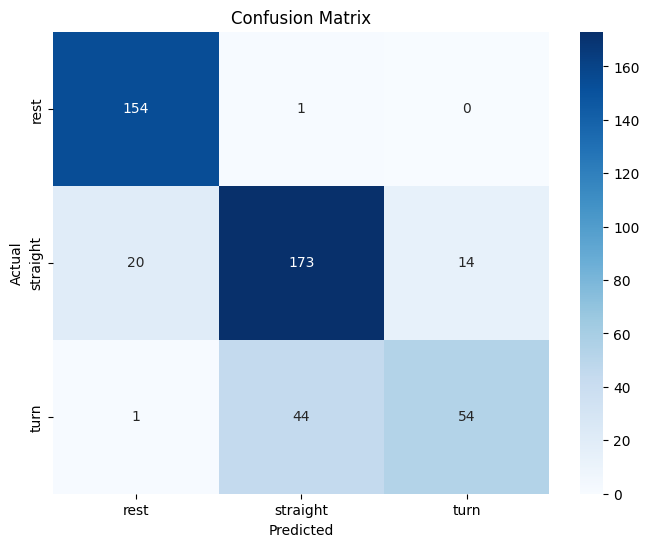

Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [38]:
# TODO - Display confusion matrix and print classification reports

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate the confusion matrix without visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a raw output
print("Confusion Matrix:")
print(conf_matrix)


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer

### Overfitting vs. Generalization:

in section 1.2.3, The perfect training score (1.00)  raises concerns about overfitting.
in section 2.1.3, The more moderate train score (0.97) suggests better generalization.

###Validation vs. Test Performance:

Section 1.2.3 has a smaller drop between validation and test scores, indicating strong performance.
Section 2.1.3 has more consistent validation and test scores, reflecting stability and better generalization.

Therefore in conclusion section 2.1.3 is a better fit.


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [39]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [40]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [41]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Ensure y2 and X2 are defined
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Predicting on test_set1 using the best model
y1_pred = best_model.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)

# Predicting on test_set2 using the best model
y2_pred = best_model.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)

# Printing test set accuracies
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [42]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Generate confusion matrix and classification report for test_set1 (X1, y1)
conf_matrix_test1 = confusion_matrix(y1, y1_pred)

# Display confusion matrix
print("Confusion Matrix for test_set1:")
print(conf_matrix_test1)

# Print classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))


Confusion Matrix for test_set1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [43]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate confusion matrix and classification report for test_set2 (X2, y2)
y2_pred = best_model.predict(X2)  # Predict on test_set2
conf_matrix_test2 = confusion_matrix(y2, y2_pred)  # Confusion matrix

# Display the confusion matrix
print("Confusion Matrix for test_set2:")
print(conf_matrix_test2)

# Print the classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

Confusion Matrix for test_set2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers

1.
Set 2.1 (Training/Validation): Validation accuracy (0.82) and test accuracy (0.83) are consistent, showing good generalization. The model performs well on rest and straight but struggles with turn.

Set 2.2 (Independent Test Sets):
Test Set 1 Accuracy: 0.83, consistent with validation performance. The turn class remains the weakest.
Test Set 2 Accuracy: 0.84, slight improvement, with better recall for turn

2.
Section 1:
Cross-Validation Train Score: 1.00 (perfect score suggests overfitting).
Cross-Validation Validation Score: 0.95 (excellent, but likely reflects overfitting to the training data).
Test-Set Score: 0.96 (high accuracy, but could be due to overfitting).

Section 2:
Cross-Validation Train Score: 0.97 (indicates good learning with less overfitting).
Cross-Validation Validation Score: 0.82 (lower than Section 1 but more realistic).
Test-Set Score: 0.83 (consistent with validation, showing better generalization).

Section 2.1 (Independent Testing Sets):
Test Set 1 Score: 0.83
Test Set 2 Score: 0.84
Performance is consistent across independent datasets, suggesting the Section 2 model generalizes better than the Section 1 model

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**

These features were chosen based on exhibition of low correlation with each other, thereby, reducing redundancy and they represent meaningful physical quantities.


1. **'a_sum' ( windowed sum of L2-norm of accelerometer readings)**: It is relevant for motion states like walking, turning, or resting and it captures the intensity of motion. Accelerometer sum provides a simple, yet effective way to quantify motion intensity.

2. **'g_sum' ( windowed sum of L2-norm of gyroscope readings)**: It is useful for distinguishing between movements involving rotation (e.g., turning) and those without. gyroscope sum provides insight into rotational motion, enhancing overall motion understanding.

3. **'ax_var' (windowed variance of accelerometer readings in X direction)**: It helps identify patterns in motion, such as: Regularity (e.g., walking), Irregularity (e.g., sudden stops) and captures subtle changes in motion intensity. Variance in acceleration highlights motion patterns and irregularities.

4. **'gy_var'(windowed variance of gyroscope readings in Y direction)**: It measures variability in frontal plane rotation (e.g., turning) and identifies changes in rotational motion patterns. Angular velocity variance in the Y-axis provides additional insight into rotational motion.

5. **'az_max'(Maximum Accelerometer in Z-direction)**: It captures peak vertical acceleration and indicates events like: Sudden jumps or drops, Changes in elevation. Maximum accelerometer in the Z-direction highlights significant events and transitions.  



In [44]:
# TODO - Load group selected features from cv_set to X

selected_features = ['a_sum', 'g_sum', 'ax_var', 'gy_var', 'az_max']
X = cv_set[selected_features]

X.head(2)
print(X.head(2))


      a_sum     g_sum        ax_var        gy_var    az_max
0  9.797418  0.022554  8.046094e-07  6.964705e-10  0.024992
1  9.798815  0.021731  1.032619e-06  6.533136e-10  0.024828


In [45]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

# Display the first two rows of y to confirm extraction
print(y.head(2))

0    rest
1    rest
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [46]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Confirm the shapes of the splits
print("\nShapes of train/test splits:")
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

# Define the pipeline with scaling and SVM classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Display initialized pipeline
print("\nInitialized pipeline:")
print(pipe)

# Define the hyperparameter grid for tuning
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and cross-validation accuracy
print("\nBest parameters found using selected features:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy achieved using selected features:")
print(grid_search.best_score_)



Shapes of train/test splits:
((1073, 5), (461, 5), (1073,), (461,))

Initialized pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

Best parameters found using selected features:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation accuracy achieved using selected features:
0.9301021517061507


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [47]:
# TODO: Print the results from the grid search

# Print results from the grid search
print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid_search.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate test set accuracy
test_set_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.93
Test-set score: 0.93


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [48]:
# TODO - Display confusion matrix and print classification report

# Generate predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[152   3   0]
 [ 11 190   6]
 [  0  11  88]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       155
    straight       0.93      0.92      0.92       207
        turn       0.94      0.89      0.91        99

    accuracy                           0.93       461
   macro avg       0.93      0.93      0.93       461
weighted avg       0.93      0.93      0.93       461



___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [49]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)



,a_sum,g_sum,ax_var,gy_var,az_max
0,9.801661,0.025634,0.000001,6.507877e-10,0.024884
1,9.802481,0.025218,0.000001,6.788807e-10,0.024881


In [50]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
# Load selected features into X2
X2 = test_set2[selected_features]

# Display first two rows of X2
X2.head(2)

,a_sum,g_sum,ax_var,gy_var,az_max
0,9.800683,0.012437,0.000002,1.211633e-09,0.049701
1,9.797741,0.013805,0.000003,1.893673e-09,0.050477


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [52]:
# TODO - Print test score accuracies for test_set1 and test_set2

# Predict and evaluate the model on test_set1 and test_set2
y1_pred = grid_search.best_estimator_.predict(X1)
y2_pred = grid_search.best_estimator_.predict(X2)

# Calculate accuracy scores
test_set1_score = accuracy_score(y1, y1_pred)
test_set2_score = accuracy_score(y2, y2_pred)

# Print test set accuracies
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.78
test_set2 score: 0.68


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [53]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Generate confusion matrix and classification report for test_set1 (X1, y1)
conf_matrix_test1 = confusion_matrix(y1, y1_pred)

# Display confusion matrix
print("Confusion Matrix for test_set1:")
print(conf_matrix_test1)

# Print classification report
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Confusion Matrix for test_set1:
[[140  91   0]
 [  6 365  40]
 [  0  35 106]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.96      0.61      0.74       231
    straight       0.74      0.89      0.81       411
        turn       0.73      0.75      0.74       141

    accuracy                           0.78       783
   macro avg       0.81      0.75      0.76       783
weighted avg       0.80      0.78      0.78       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [55]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate confusion matrix and classification report for test_set2 (X2, y2)
conf_matrix_test2 = confusion_matrix(y2, y2_pred)

# Display confusion matrix
print("Confusion Matrix for test_set2:")
print(conf_matrix_test2)

# Print classification report
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))


Confusion Matrix for test_set2:
[[  0   0  16]
 [  0 190  16]
 [  0  63  12]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.75      0.92      0.83       206
        turn       0.27      0.16      0.20        75

    accuracy                           0.68       297
   macro avg       0.34      0.36      0.34       297
weighted avg       0.59      0.68      0.63       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers

#Question 1:

### Comparing with Model trained in Section 1 using *all features*:
The model in Section 1 performs better on the primary test set (0.96) and test_set1 (0.92) but overfits, as shown by the sharp drop on test_set2 (0.25). In contrast, the Section 3 model has slightly lower scores on the primary test set (0.93) and test_set1 (0.78) but generalizes much better on test_set2 (0.68), indicating greater robustness to data variability.

Conclusion: the Section 3 model is more suitable for scenarios requiring adaptability to diverse datasets.

### Comparing with Model trained in Section 2 using *selected features*:
Section 2: The model generalizes well with stable performance across test sets (Test Set 1: 0.83, Test Set 2: 0.84) but has lower validation (0.82) and test (0.83) scores compared to Section 3.

Section 3: While it achieves higher validation (0.93) and overall test (0.93) scores, performance drops significantly on Test Set 1 (0.78) and Test Set 2 (0.68), indicating poor generalization and possible overfitting.

Conclusion: Section 2's model is more stable and generalizable, while Section 3's model performs better on similar data but struggles with variability.





#Question 2:
### Section 1: All Features
Excellent training and validation scores, but test_set2 performs poorly (0.25) due to overfitting and likely domain shift. Including all features captured noise and irrelevant patterns.

### Section 2: Selected Features
Lower training/validation scores but improved generalization. Consistent performance across test sets, including test_set2 (0.84), due to reduced overfitting and better feature robustness.

### Section 3: Balanced Approach
High training and validation scores with better generalization. Improved test_set2 performance (0.68), though still impacted by domain shift, indicating an effective trade-off between complexity and generalization.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____